# 1. 라이브러리 및 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:\python\dacon\따릉이\\train.csv")
test = pd.read_csv("C:\python\dacon\따릉이\\test.csv")
submission = pd.read_csv("C:\python\dacon\따릉이\submission.csv")

# 2. EDA

In [3]:
train.head(3)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0


In [4]:
test.head(3)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0


In [5]:
submission.head(3)

,id,count
0,0,NaN
1,1,NaN
2,2,NaN


In [6]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


In [7]:
print(train.columns)
print(test.columns)
print(submission.columns)

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')
Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')
Index(['id', 'count'], dtype='object')


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [10]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [11]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# 3. 데이터 전처리

### 결측값 처리
#### train data

In [12]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

- 범주형 변수

In [13]:
train['hour_bef_precipitation'].value_counts()

# 상대적으로 많은 0으로 대체

0.0    1411
1.0      46
Name: hour_bef_precipitation, dtype: int64

In [14]:
train['hour_bef_precipitation'].fillna(value = '0', inplace=True) 

In [15]:
train['hour_bef_precipitation'].isna().sum()

0

- 이산형 변수

In [65]:
print(train['hour_bef_temperature'].mean())
print(train['hour_bef_windspeed'].mean())
print(train['hour_bef_humidity'].mean())
print(train['hour_bef_visibility'].mean())
print(train['hour_bef_ozone'].mean())
print(train['hour_bef_pm10'].mean())
print(train['hour_bef_pm2.5'].mean())

# 평균값으로 대체

16.71743308167465
2.4790344827586246
52.23129718599863
1405.2168840082359
0.03914895155459139
57.168736303871405
30.32712369597621


In [17]:
train_isna = train.isna().sum()
train_isna

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      0
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [18]:
train_na_col = train_isna[train_isna > 0].index
train_na_col

# 널 값이 포함된 인덱스

Index(['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

---

In [19]:
def fill_na(df, column):
    df[column] = df[column].fillna(value = df[column].mean())
    
# 결측값 대체 함수 생성

---

In [20]:
for col in train_na_col:
    fill_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [21]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

#### test data

- 범주형 변수

In [67]:
test['hour_bef_precipitation'].value_counts()

# 상대적으로 많은 0으로 대체

0.0    677
1.0     37
0        1
Name: hour_bef_precipitation, dtype: int64

In [68]:
test['hour_bef_precipitation'].fillna(value = '0', inplace=True) 

In [23]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

- 이산형 변수

In [24]:
test_isna = test.isna().sum()
test_isna

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [25]:
test_na_col = test_isna[test_isna > 0].index
test_na_col
# 널 값이 포함된 인덱스

Index(['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [26]:
for col in test_na_col:
    fill_na(test, col)
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [69]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

# 4. 변수선택 및 모델링

## 변수 관계 

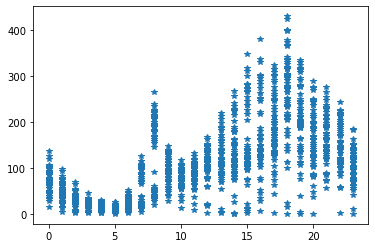

In [28]:
plt.plot('hour', 'count', '*', data=train)

<AxesSubplot:>

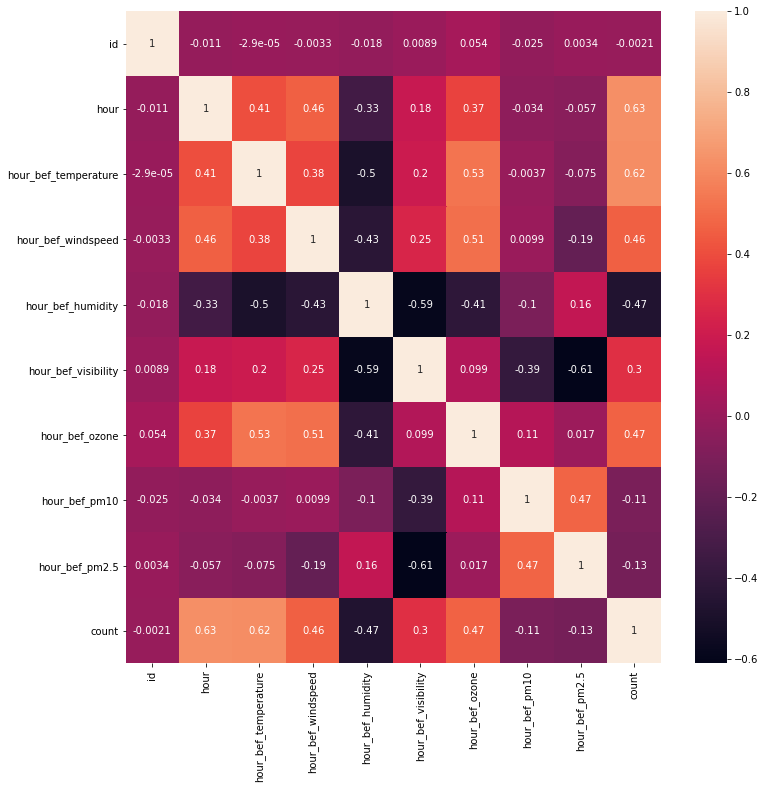

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot = True)

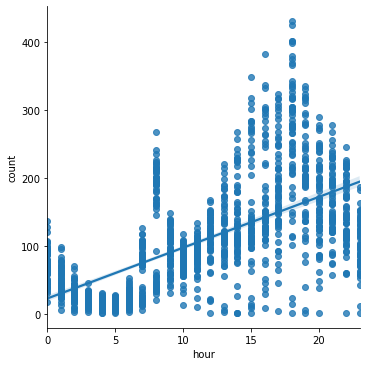

In [30]:
sns.lmplot(x='hour',y='count',data=train)

In [31]:
xfet = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility','hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

In [32]:
xfets = train[xfet].columns

In [33]:
xfets

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

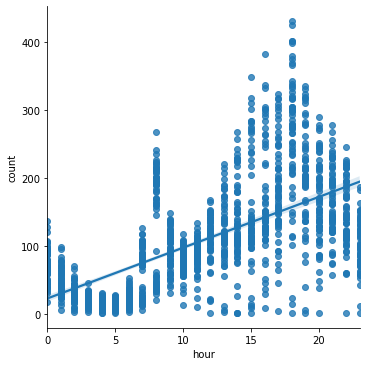

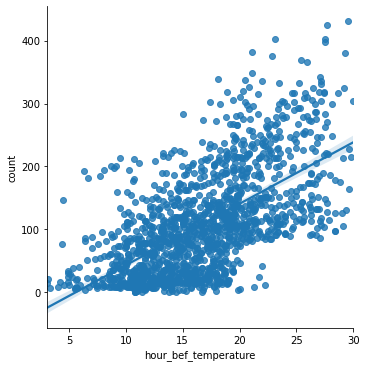

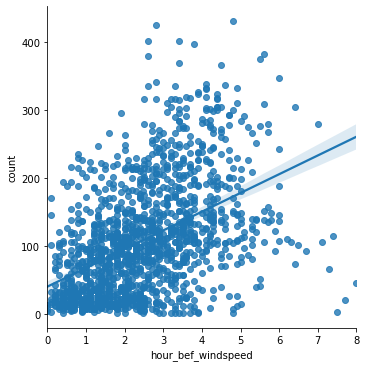

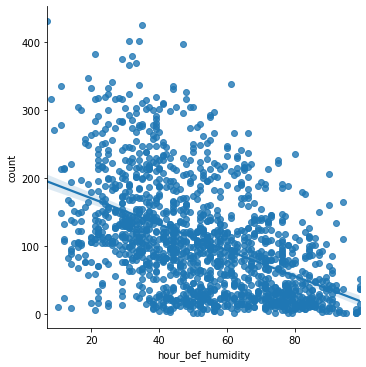

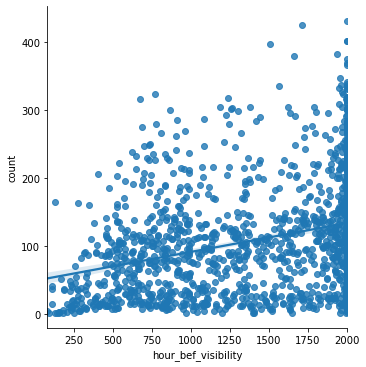

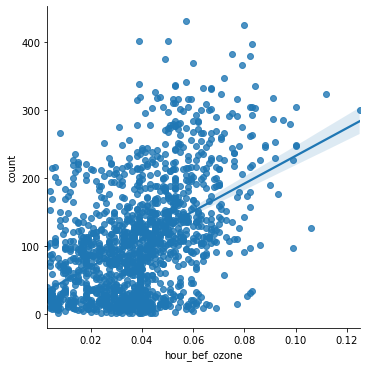

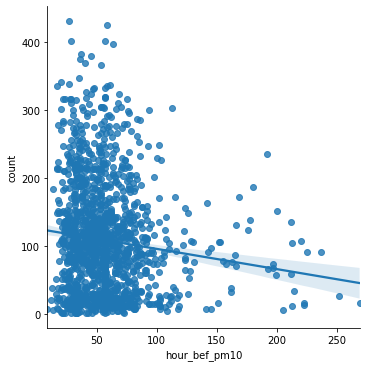

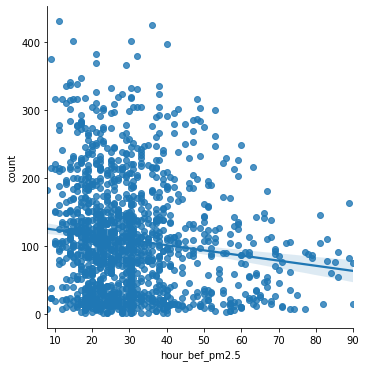

In [34]:
for i in xfets:
    sns.lmplot(x=i, y='count', data=train)

## 라이브러리

In [72]:
from sklearn.linear_model import LinearRegression #선형회귀

from sklearn.ensemble import RandomForestRegressor #랜덤포레스트
from sklearn.model_selection import GridSearchCV #GVsearch
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearch 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0) #교차검증

from sklearn.ensemble import GradientBoostingRegressor #그래디언트 부스팅

## 변수 선택

In [36]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [70]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_ozone', 'hour_bef_windspeed', 'hour_bef_humidity']

# lmplot을 통해 선정한 독립변수

In [38]:
X_train = train[features]
y_train = train['count']
X_test = test[features] 

## 1) 선형회귀분석

#### 모델링

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_predict = lr.predict(X_test)

#### 모델 평가 (Kfold)

In [42]:
scoring = 'accuracy'
lr_score = cross_val_score(lr, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\Users\user\anaconda3\2\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, y_pred = _check_tar

NameError: name 'score' is not defined

#### 제출

In [110]:
submission['count'] = lr_predict
submission.to_csv('lr.csv', index=False)

## 2) 랜덤포레스트

In [44]:
rf = RandomForestRegressor()

### (1) GVsearchCV

In [46]:
param = {'min_samples_split': range(1,5),
        'max_depth':range(8,12,2),
        'n_estimators': range(250,450,50)}

In [47]:
gs = GridSearchCV(estimator=rf, param_grid=param, scoring='neg_mean_squared_error',cv=3)

In [48]:
gs.fit(X_train, y_train)

C:\Users\user\anaconda3\2\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\2\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\2\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\2\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\2\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(8, 12, 2),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(250, 450, 50)},
             scoring='neg_mean_squared_error')

In [49]:
print('최고 정확도 : ', gs.best_score_)
print('최고 파라미터 : ', gs.best_params_)

최고 정확도 :  -1758.9406322033885
최고 파라미터 :  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 400}


In [50]:
rf_gs_predict = gs.predict(X_test)

#### 제출

In [159]:
submission['count'] = rf_gs_predict
submission.to_csv('rf_gs.csv', index=False)

### (2) RandomizedSearchCV

In [52]:
rs_model = RandomForestRegressor()

In [53]:
param = {'min_samples_split': range(12,15),
        'max_depth': range(8,11),
        'n_estimators': range(222,225)}

In [54]:
rs = RandomizedSearchCV(estimator=rs_model, param_distributions=param, scoring = 'neg_mean_squared_error', cv=3)

In [55]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(8, 11),
                                        'min_samples_split': range(12, 15),
                                        'n_estimators': range(222, 225)},
                   scoring='neg_mean_squared_error')

In [56]:
print('최고 정확도 : ', rs.best_score_)
print('최고 파라미터 : ', rs.best_params_)

최고 정확도 :  -1755.273313035152
최고 파라미터 :  {'n_estimators': 224, 'min_samples_split': 14, 'max_depth': 9}


In [57]:
rf_rs_predict = rs.predict(X_test)

#### 제출

In [94]:
submission['count'] = rf_rs_predict
submission.to_csv('rf_rs.csv', index=False)

## 3) 그래디언트 부스팅

In [59]:
gb = GradientBoostingRegressor(random_state=1)

In [60]:
param = [{'n_estimators':range(19,23),
         'max_features':range(2,5),
         'max_depth':range(3,5),
         'learning_rate':np.linspace(0.1,1,10)}]

In [61]:
gs = GridSearchCV(estimator=gb, param_grid=param, scoring='r2', cv=3, n_jobs=-1 )

In [62]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'max_depth': range(3, 5), 'max_features': range(2, 5),
                          'n_estimators': range(19, 23)}],
             scoring='r2')

In [63]:
print('최고 정확도 : ', gs.best_score_)
print('최고 파라미터 : ', gs.best_params_)

최고 정확도 :  0.7392382203920329
최고 파라미터 :  {'learning_rate': 0.30000000000000004, 'max_depth': 4, 'max_features': 4, 'n_estimators': 22}


In [64]:
gb_gs_predict = gs.predict(X_test)

#### 제출

In [257]:
submission['count'] = gb_gs_predict
submission.to_csv('gb_gs.csv', index=False)